In [1]:
import yfinance as yf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Download SPY data
ticker_symbol = "SPY"
start_date = "2013-01-01"
end_date = "2023-12-31"
spy_data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
# Selecting features and target variable
data = spy_data[['Open', 'High', 'Low', 'Close', 'Volume']]
data['Days'] = (data.index - data.index[0]).days.values

In [4]:
# Split the data into features (X) and target variable (y)
X = data[['Days', 'Open', 'High', 'Low', 'Volume']].values
y = data['Close'].values

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [6]:
# Feature scaling for input features only
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [7]:
# Train the SVR model
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [8]:
# Make predictions
y_pred = svr_model.predict(X_test_scaled)

In [9]:
# Evaluate the model
mae_SVR = mean_absolute_error(y_test, y_pred)
mse_SVR = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error - SVR: {mae_SVR}")
print(f"Mean Squared Error - SVR: {mse_SVR}")

Mean Absolute Error - SVR: 1.0221497618612505
Mean Squared Error - SVR: 2.6233857683248054


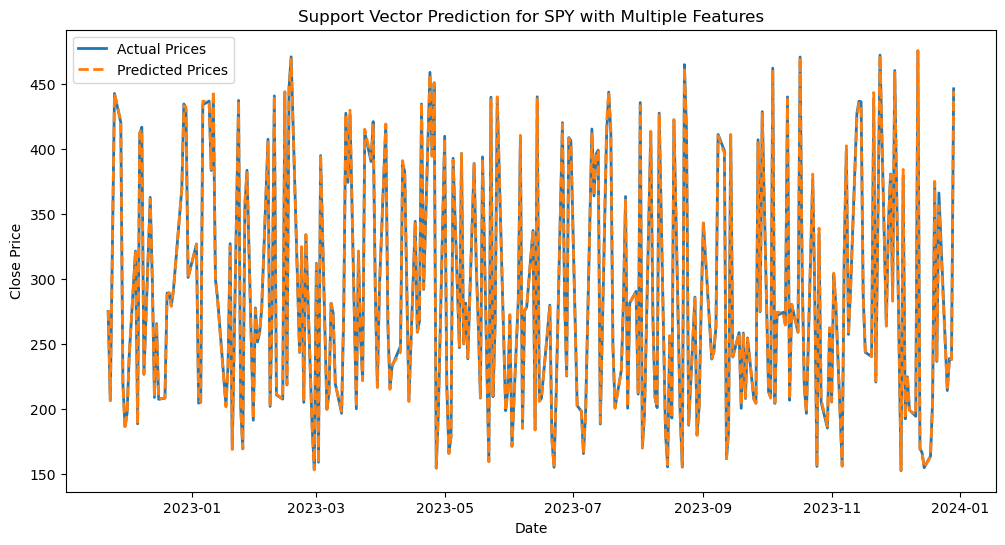

In [10]:
# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(spy_data.index[-len(y_test):], y_test, label='Actual Prices', linewidth=2)
plt.plot(spy_data.index[-len(y_test):], y_pred, label='Predicted Prices', linestyle='--', linewidth=2)
plt.title('Support Vector Prediction for SPY with Multiple Features')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Mean Absolute Error - Xgboost: 1.109009395007192
Mean Squared Error - Xgboost: 2.6851585637954556


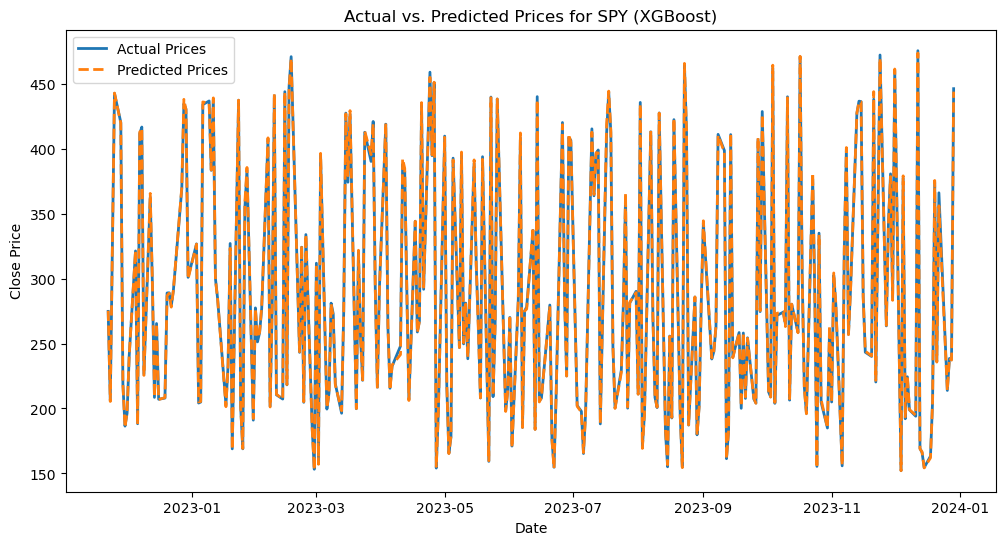

In [11]:
# Train the XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mae_Xgboost = mean_absolute_error(y_test, y_pred)
mse_Xgboost = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error - Xgboost: {mae_Xgboost}")
print(f"Mean Squared Error - Xgboost: {mse_Xgboost}")

# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(spy_data.index[-len(y_test):], y_test, label='Actual Prices', linewidth=2)
plt.plot(spy_data.index[-len(y_test):], y_pred, label='Predicted Prices', linestyle='--', linewidth=2)
plt.title('Actual vs. Predicted Prices for SPY (XGBoost)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Mean Absolute Error - decision tree: 1.2287737574387974
Mean Squared Error - decision tree: 4.72673836174263


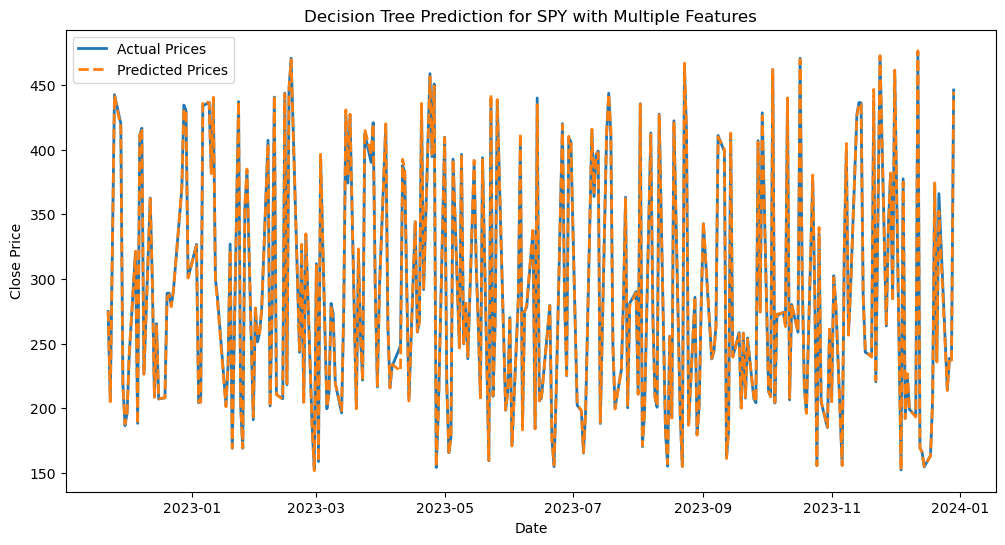

In [12]:
# Build a Decision Tree model
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae_tree = mean_absolute_error(y_test, y_pred)
mse_tree = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error - decision tree: {mae_tree}")
print(f"Mean Squared Error - decision tree: {mse_tree}")

# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices', linewidth=2)
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Prices', linestyle='--', linewidth=2)
plt.title('Decision Tree Prediction for SPY with Multiple Features')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Mean Absolute Error - random forest: 0.9285792205480039
Mean Squared Error - forest: 2.1375142937691085


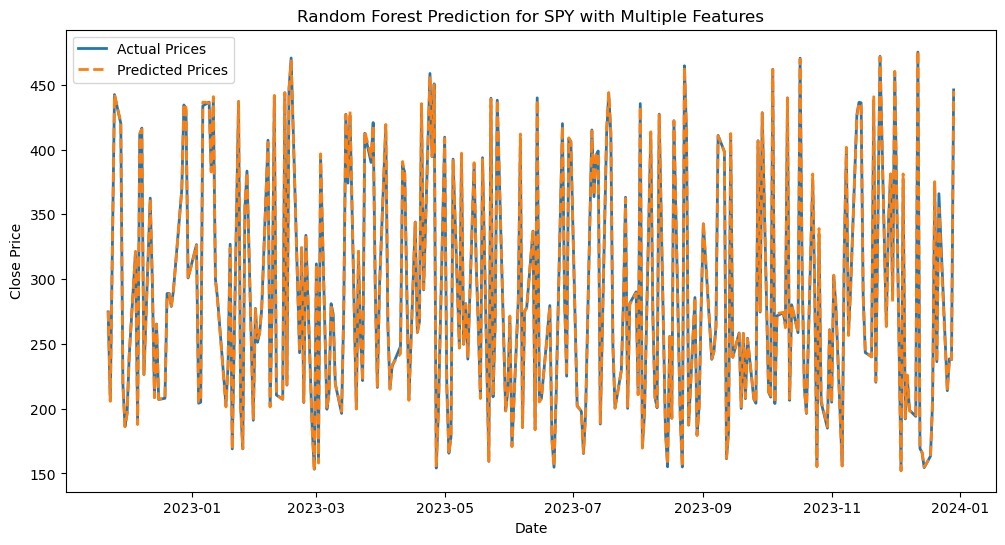

In [13]:
# Build a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error - random forest: {mae_rf}")
print(f"Mean Squared Error - forest: {mse_rf}")

# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices', linewidth=2)
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Prices', linestyle='--', linewidth=2)
plt.title('Random Forest Prediction for SPY with Multiple Features')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [14]:
print(f"Mean Absolute Error - random forest: {mae_rf}")
print(f"Mean Squared Error - forest: {mse_rf}")

print(f"Mean Absolute Error - decision tree: {mae_tree}")
print(f"Mean Squared Error - decision tree: {mse_tree}")

print(f"Mean Absolute Error - Xgboost: {mae_Xgboost}")
print(f"Mean Squared Error - Xgboost: {mse_Xgboost}")

print(f"Mean Absolute Error - SVR: {mae_SVR}")
print(f"Mean Squared Error - SVR: {mse_SVR}")

Mean Absolute Error - random forest: 0.9285792205480039
Mean Squared Error - forest: 2.1375142937691085
Mean Absolute Error - decision tree: 1.2287737574387974
Mean Squared Error - decision tree: 4.72673836174263
Mean Absolute Error - Xgboost: 1.109009395007192
Mean Squared Error - Xgboost: 2.6851585637954556
Mean Absolute Error - SVR: 1.0221497618612505
Mean Squared Error - SVR: 2.6233857683248054
